In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
from scipy.constants import speed_of_light as c
import xarray as xr
import seaborn as sns


In [2]:
import konrad
konrad.__file__

/home/pc2943/.conda/envs/konrad_edit/lib/python3.9/site-packages/typhon/nonlte/rtc/__init__.py:9: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def FOSC(tau, Sb, Sm, Ib):


'/home/pc2943/konrad/konrad/__init__.py'

In [3]:
# TNR font
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = 'stix'
plt.rcParams['text.usetex'] = False

### set figure params
tick_fontsize = 14
legend_fontsize = 16
label_fontsize = 18
text_fontsize = 18
title_fontsize = 20
marker_fontsize = 9

In [4]:
o3_color = "#335C67"
n2o_color = "#2A9D8F"
cfc11_color = "#99A88C"
cfc12_color = "#E09F3E"
ch4_color = "#9E2A2B"
co2_color = "#540B0E"

In [5]:
present_lw = xr.open_dataset('/home/pc2943/ddq-data-paper-figures/files/all_forcing_lw_rrms.h5', engine = "netcdf4")
present_flux_mean = present_lw.present_flux_means.data
present_heat_mean = present_lw.present_heat_means.data


In [6]:
# read in saved LW errors
lw_errors = xr.open_dataset('/home/pc2943/ddq-data-paper-figures/files/all_forcing_lw_rrms_order.h5', engine = "netcdf4")

ch4_flux_means = lw_errors.ch4_flux_means.data
ch4_heat_means = lw_errors.ch4_heat_means.data
ch4_forcing_means = lw_errors.ch4_forcing_means.data

n2o_flux_means = lw_errors.n2o_flux_means.data
n2o_heat_means = lw_errors.n2o_heat_means.data
n2o_forcing_means = lw_errors.n2o_forcing_means.data

o3_flux_means = lw_errors.o3_flux_means.data
o3_heat_means = lw_errors.o3_heat_means.data
o3_forcing_means = lw_errors.o3_forcing_means.data

cfc11_flux_means = lw_errors.cfc11_flux_means.data
cfc11_heat_means = lw_errors.cfc11_heat_means.data
cfc11_forcing_means = lw_errors.cfc11_forcing_means.data

cfc12_flux_means = lw_errors.cfc12_flux_means.data
cfc12_heat_means = lw_errors.cfc12_heat_means.data
cfc12_forcing_means = lw_errors.cfc12_forcing_means.data

co2_flux_means = lw_errors.co2_flux_means.data
co2_heat_means = lw_errors.co2_heat_means.data
co2_forcing_means = lw_errors.co2_forcing_means.data


n_array = np.array([1/8, 1/4, 1/2, 2, 4, 8])

In [7]:
rrtmgp_lw = xr.open_dataset('files/all_forcing_lw_rrms_rrtmgp.h5', engine = "netcdf4")

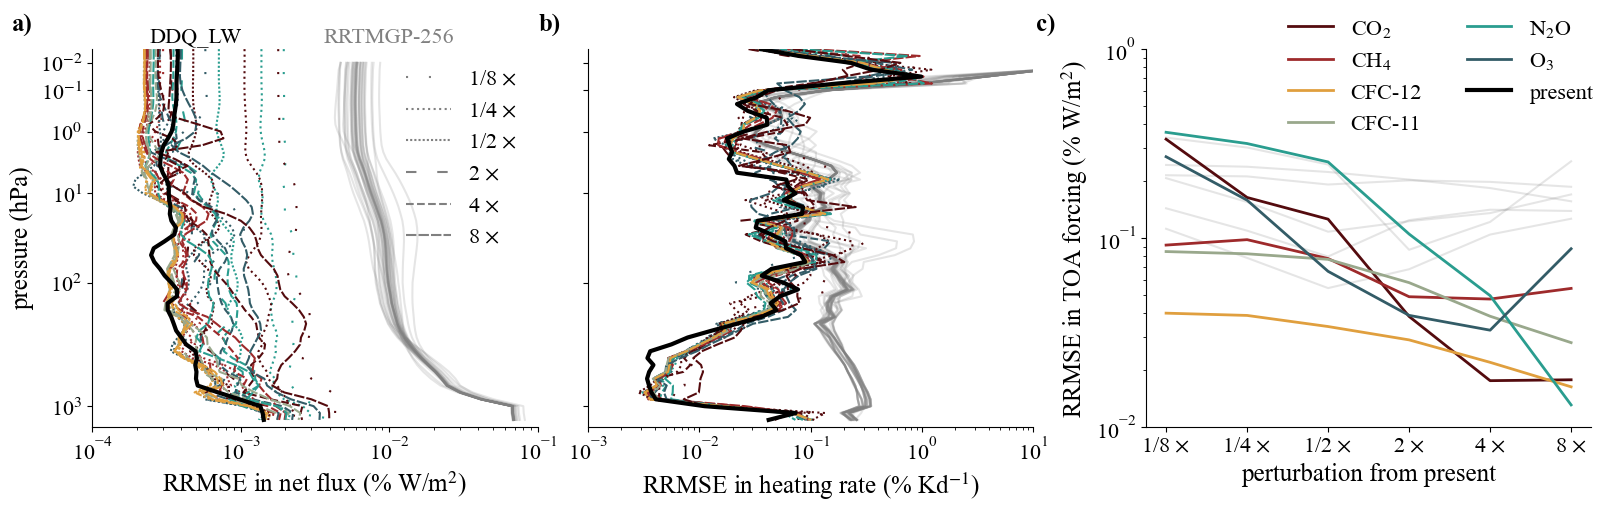

In [8]:

fig, axes = plt.subplots(1, 3, figsize = (16,5), layout = 'compressed')
sns.despine()
alpha_array = np.array([1, 1, 1, 1, 1, 1])
loosely_dotted = (0, (1, 10))
densely_dotted = (0, (1, 1))
loosely_dashed = (0, (5, 10))
densely_dashed = (0, (5, 1))

linestyle_array = [loosely_dotted, 'dotted', densely_dotted, loosely_dashed, 'dashed', densely_dashed]

for n_idx, n in enumerate(n_array):
    axes[0].semilogx(rrtmgp_lw.ch4_flux_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(rrtmgp_lw.n2o_flux_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(rrtmgp_lw.o3_flux_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(rrtmgp_lw.cfc11_flux_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(rrtmgp_lw.cfc12_flux_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(rrtmgp_lw.co2_flux_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)

for n_idx, n in enumerate(n_array):
    axes[1].semilogx(rrtmgp_lw.ch4_heat_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[1].semilogx(rrtmgp_lw.n2o_heat_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[1].semilogx(rrtmgp_lw.o3_heat_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[1].semilogx(rrtmgp_lw.cfc11_heat_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[1].semilogx(rrtmgp_lw.cfc12_heat_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[1].semilogx(rrtmgp_lw.co2_heat_means.data[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)

axes[2].semilogy(np.arange(len(n_array)), rrtmgp_lw.co2_forcing_means, color = 'grey', alpha = 0.2)
axes[2].semilogy(np.arange(len(n_array)), rrtmgp_lw.ch4_forcing_means, color = 'grey', alpha = 0.2)
axes[2].semilogy(np.arange(len(n_array)), rrtmgp_lw.o3_forcing_means, color = 'grey', alpha = 0.2)
axes[2].semilogy(np.arange(len(n_array)), rrtmgp_lw.cfc11_forcing_means, color = 'grey', alpha = 0.2)
axes[2].semilogy(np.arange(len(n_array)), rrtmgp_lw.cfc12_forcing_means, color = 'grey', alpha = 0.2)
axes[2].semilogy(np.arange(len(n_array)), rrtmgp_lw.n2o_forcing_means, color = 'grey', alpha = 0.2)


for n_idx, n in enumerate(n_array):
    axes[0].semilogx(ch4_flux_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = ch4_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(n2o_flux_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = n2o_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(o3_flux_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = o3_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(cfc11_flux_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = cfc11_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(cfc12_flux_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = cfc12_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(co2_flux_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = co2_color, linestyle = linestyle_array[n_idx])

for n_idx, n in enumerate(n_array):
    axes[1].semilogx(ch4_heat_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = ch4_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(n2o_heat_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = n2o_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(o3_heat_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = o3_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(cfc11_heat_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = cfc11_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(cfc12_heat_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = cfc12_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(co2_heat_means[n_idx, :], np.arange(55), alpha = alpha_array[n_idx], color = co2_color, linestyle = linestyle_array[n_idx])

### dummy plots for legends
label_array = ["1/8 $\\times$", "1/4 $\\times$", "1/2 $\\times$", "2 $\\times$", "4 $\\times$", "8 $\\times$"]
for n_idx, n in enumerate(n_array):
    axes[0].semilogx([],[], color = 'grey', linestyle = linestyle_array[n_idx], label = label_array[n_idx])
axes[0].legend(frameon = False, fontsize = 16)

axes[2].semilogy(np.arange(len(n_array)), co2_forcing_means, color = co2_color, label = "CO$_2$", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), ch4_forcing_means, color = ch4_color, label = "CH$_4$", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), cfc12_forcing_means, color = cfc12_color, label = "CFC-12", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), cfc11_forcing_means, color = cfc11_color, label = "CFC-11", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), n2o_forcing_means, color = n2o_color, label = "N$_2$O", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), o3_forcing_means, color = o3_color, label = "O$_3$", linewidth = 2)
axes[2].semilogy([],[], color = 'black', linewidth = 3, label = 'present')

axes[0].semilogx(present_flux_mean, np.arange(55), color = 'black', linewidth = 3)
axes[1].plot(present_heat_mean, np.arange(55), color = 'black', linewidth = 3)

axes[0].set_ylim([55, 0])
axes[0].set_ylabel("pressure (hPa)", fontsize = 18)
axes[0].set_xlabel('RRMSE in net flux (% W/m$^2$)', ha='center', fontsize = 18)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].set_yticks(np.array([2, 6, 12, 21, 34, 52]))
axes[0].set_yticklabels(np.array(['10$^{-2}$', '10$^{-1}$', '10$^{0}$', '10$^{1}$', '10$^{2}$', '10$^{3}$']), fontsize = 16)
axes[0].set_xlim([10**-4, 10**-1])

axes[1].set_ylim([55, 0])
#axes[1].set_ylabel("pressure (hPa)")
axes[1].tick_params(axis='both', labelsize=16)
axes[1].set_xlabel('RRMSE in heating rate (% Kd$^{-1}$)', ha='center', fontsize = 18)
axes[1].set_yticks(np.array([2, 6, 12, 21, 34, 52]))
axes[1].set_yticklabels(np.array(['', '', '', '', '', '']))
axes[1].set_xlim([10**-3, 10])

axes[2].tick_params(axis='both', labelsize=16)
axes[2].set_xlabel("perturbation from present", fontsize = 18)
axes[2].set_ylabel("RRMSE in TOA forcing (% W/m$^2$)", fontsize = 18)
axes[2].set_xticks(np.arange(len(n_array)))
axes[2].set_xticklabels(["1/8 $\\times$", "1/4 $\\times$", "1/2 $\\times$", "2 $\\times$", "4 $\\times$", "8 $\\times$"], fontsize = 16)
axes[2].legend(frameon = False, fontsize = 16, ncol = 2, loc = (0.3, 0.75))
axes[2].set_ylim([10**-2, 10**0])

fig.text(0.01, 0.95, 'a)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')
fig.text(0.34, 0.95, 'b)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')
fig.text(0.65, 0.95, 'c)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')

axes[0].text(10**-2, -1, 'RRTMGP-256', color = 'grey', fontsize = 16, horizontalalignment = 'center')
axes[0].text(5*10**-4, -1, 'DDQ_LW', color = 'black', fontsize = 16, horizontalalignment = 'center')

plt.savefig("figures/lw_all_gases.png", bbox_inches = 'tight', dpi = 300)

plt.show()

In [9]:
sw_present_errs = xr.open_dataset('files/present_sw_rrms.h5', engine = "netcdf4")
flux_errs = sw_present_errs.flux_errs.data
heat_errs = sw_present_errs.heat_errs.data

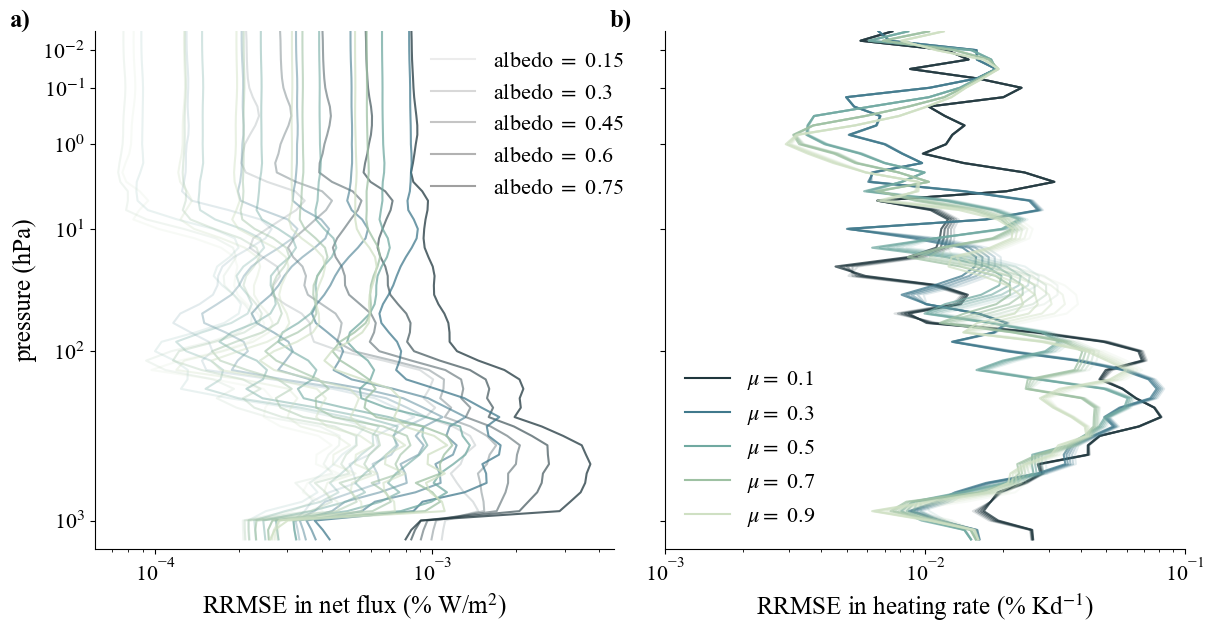

In [11]:
lats = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
albedos = np.array([0.15, 0.30, 0.45, 0.60, 0.75])

lat_colors = np.array(['#1F363D', '#40798C', '#70A9A1', '#9EC1A3', '#CFE0C3'])

fig, axes = plt.subplots(1, 2, figsize = (12,6), layout = 'compressed')
sns.despine()

scenario_idx = 0
for lat_idx, lat in enumerate(lats):
    for albedo_idx, albedo in enumerate(albedos):
        axes[0].semilogx(flux_errs[scenario_idx, :], np.arange(55), color = lat_colors[lat_idx], alpha = albedos[albedo_idx])
        scenario_idx += 1
axes[0].set_xlabel("RRMSE in net flux (% W/m$^2$)", fontsize = 18)
axes[0].set_ylabel("pressure (hPa)", fontsize = 18)
axes[0].set_ylim([55, 0])

for albedo_idx, albedo in enumerate(albedos):
    axes[0].plot([], [], color = 'grey', alpha = albedos[albedo_idx], label = 'albedo $=$ ' + str(albedo))

for lat_idx, lat in enumerate(lats):
    axes[1].plot([], [], color = lat_colors[lat_idx], label = '$\\mu =$ ' + str(lat))

axes[0].legend(frameon = False, fontsize = 16, loc = (0.63, 0.66))
axes[1].legend(frameon = False, fontsize = 16, loc = 'lower left')

scenario_idx = 0
for lat_idx, lat in enumerate(lats):
    for albedo_idx, albedo in enumerate(albedos):
        axes[1].semilogx(heat_errs[scenario_idx, :], np.arange(55), color = lat_colors[lat_idx], alpha = albedos[albedo_idx])
        scenario_idx += 1
axes[1].set_xlabel("RRMSE in heating rate (% Kd$^{-1}$)", fontsize = 18)
axes[1].set_ylim([55, 0])

axes[0].set_yticks(np.array([2, 6, 12, 21, 34, 52]))
axes[0].set_yticklabels(np.array(['10$^{-2}$', '10$^{-1}$', '10$^{0}$', '10$^{1}$', '10$^{2}$', '10$^{3}$']), fontsize = 16)

axes[1].set_yticks(np.array([2, 6, 12, 21, 34, 52]))
axes[1].set_yticklabels(np.array(['', '', '', '', '', '']))
axes[1].set_xlim([10**-3, 10**-1])

axes[0].tick_params(axis='both', labelsize=16)
axes[1].tick_params(axis='both', labelsize=16)


fig.text(0.01, 1, 'a)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')
fig.text(0.51, 1, 'b)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')

plt.savefig("figures/sw_present_var.png", bbox_inches = 'tight', dpi = 300)

plt.show()


In [12]:
# read in saved LW errors
ch4_flux_means = np.array([xr.open_dataset('files/rel_rms_0.125x_ch4_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_ch4_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_ch4_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_ch4_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_ch4_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_ch4_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

ch4_heat_means = np.array([xr.open_dataset('files/rel_rms_0.125x_ch4_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_ch4_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_ch4_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_ch4_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_ch4_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_ch4_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

ch4_forcing_means = np.array([xr.open_dataset('files/rel_rms_0.125x_ch4_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_ch4_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_ch4_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_ch4_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_ch4_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_ch4_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0)])

n2o_flux_means = np.array([xr.open_dataset('files/rel_rms_0.125x_n2o_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_n2o_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_n2o_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_n2o_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_n2o_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_n2o_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

n2o_heat_means = np.array([xr.open_dataset('files/rel_rms_0.125x_n2o_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_n2o_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_n2o_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_n2o_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_n2o_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_n2o_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

n2o_forcing_means = np.array([xr.open_dataset('files/rel_rms_0.125x_n2o_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_n2o_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_n2o_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_n2o_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_n2o_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_n2o_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0)])

o3_flux_means = np.array([xr.open_dataset('files/rel_rms_0.125x_o3_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_o3_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_o3_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_o3_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_o3_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_o3_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

o3_heat_means = np.array([xr.open_dataset('files/rel_rms_0.125x_o3_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_o3_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_o3_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_o3_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_o3_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_o3_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

o3_forcing_means = np.array([xr.open_dataset('files/rel_rms_0.125x_o3_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_o3_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_o3_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_o3_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_o3_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_o3_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0)])

co2_flux_means = np.array([xr.open_dataset('files/rel_rms_0.125x_co2_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_co2_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_co2_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_co2_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_co2_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_co2_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

co2_heat_means = np.array([xr.open_dataset('files/rel_rms_0.125x_co2_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_co2_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_co2_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_co2_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_co2_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_co2_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

co2_forcing_means = np.array([xr.open_dataset('files/rel_rms_0.125x_co2_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_co2_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_co2_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_co2_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_co2_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_co2_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0].mean(axis = 0)])

present_flux_mean = sw_present_errs.flux_errs.data.mean(axis = 0)
present_heat_mean = sw_present_errs.heat_errs.data.mean(axis = 0)

In [13]:
# read in saved LW errors
ch4_flux_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_ch4_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_ch4_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_ch4_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

ch4_heat_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_ch4_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_ch4_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_ch4_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

ch4_forcing_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_ch4_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0],
                           xr.open_dataset('files/rel_rms_0.25x_ch4_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_0.5x_ch4_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_2.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_4.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_8.0x_ch4_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0]])

n2o_flux_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_n2o_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_n2o_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_n2o_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

n2o_heat_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_n2o_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_n2o_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_n2o_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

n2o_forcing_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_n2o_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0],
                           xr.open_dataset('files/rel_rms_0.25x_n2o_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_0.5x_n2o_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_2.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_4.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_8.0x_n2o_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0]])

o3_flux_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_o3_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_o3_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_o3_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

o3_heat_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_o3_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_o3_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_o3_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

o3_forcing_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_o3_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0],
                           xr.open_dataset('files/rel_rms_0.25x_o3_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_0.5x_o3_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_2.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_4.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_8.0x_o3_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0]])

co2_flux_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_co2_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_co2_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_co2_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').flux_errs.data[:, 0, :].mean(axis = 0)])

co2_heat_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_co2_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0),
                           xr.open_dataset('files/rel_rms_0.25x_co2_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_0.5x_co2_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_2.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_4.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0), 
                           xr.open_dataset('files/rel_rms_8.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').heat_errs.data[:, 0, :].mean(axis = 0)])

co2_forcing_means_rrtmgp = np.array([xr.open_dataset('files/rel_rms_0.125x_co2_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0],
                           xr.open_dataset('files/rel_rms_0.25x_co2_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_0.5x_co2_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_2.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_4.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0], 
                           xr.open_dataset('files/rel_rms_8.0x_co2_rrtmgp_01.h5', engine = 'netcdf4').forcing_errs.data[:, 0]])
present_rrtmgp = xr.open_dataset('files/rel_rms_present_rrtmgp_01.h5', engine = "netcdf4")
present_flux_mean_rrtmgp = present_rrtmgp.flux_errs.data.mean(axis = 0)
present_heat_mean_rrtmgp = present_rrtmgp.heat_errs.data.mean(axis = 0)

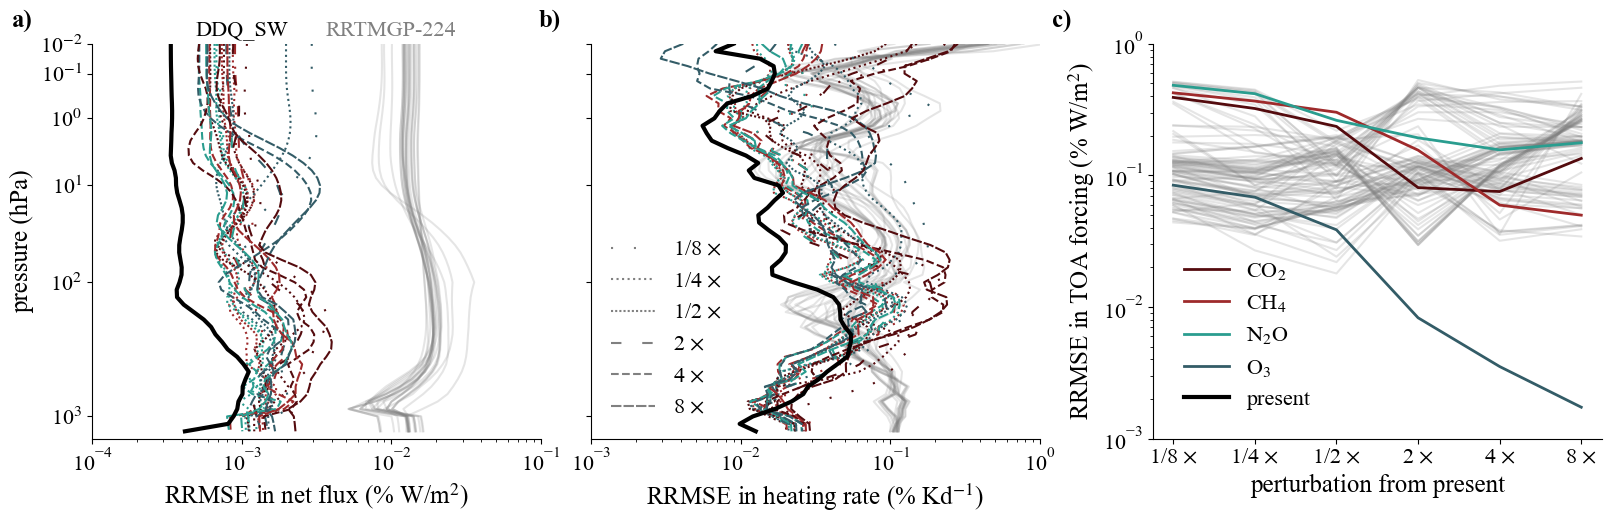

In [14]:
n_array = np.array([1/8, 1/4, 1/2, 2, 4, 8])

fig, axes = plt.subplots(1, 3, figsize = (16,5), layout = 'compressed')
sns.despine()
alpha_array = np.array([1, 1, 1, 1, 1, 1])
loosely_dotted = (0, (1, 10))
densely_dotted = (0, (1, 1))
loosely_dashed = (0, (5, 10))
densely_dashed = (0, (5, 1))

linestyle_array = [loosely_dotted, 'dotted', densely_dotted, loosely_dashed, 'dashed', densely_dashed]

for n_idx, n in enumerate(n_array):
    axes[0].semilogx(ch4_flux_means_rrtmgp[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(n2o_flux_means_rrtmgp[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(o3_flux_means_rrtmgp[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)
    axes[0].semilogx(co2_flux_means_rrtmgp[n_idx, :], np.arange(2, 55), color = 'grey', alpha = 0.2)


for n_idx, n in enumerate(n_array):
    axes[0].semilogx(ch4_flux_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = ch4_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(n2o_flux_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = n2o_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(o3_flux_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = o3_color, linestyle = linestyle_array[n_idx])
    axes[0].semilogx(co2_flux_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = co2_color, linestyle = linestyle_array[n_idx])

for n_idx, n in enumerate(n_array):
    axes[1].semilogx(ch4_heat_means_rrtmgp[n_idx, :], np.arange(2, 55), alpha = 0.2, color = 'grey')
    axes[1].semilogx(n2o_heat_means_rrtmgp[n_idx, :], np.arange(2, 55), alpha = 0.2, color = 'grey')
    axes[1].semilogx(o3_heat_means_rrtmgp[n_idx, :], np.arange(2, 55), alpha = 0.2, color = 'grey')
    axes[1].semilogx(co2_heat_means_rrtmgp[n_idx, :], np.arange(2, 55), alpha = 0.2, color = 'grey')


for n_idx, n in enumerate(n_array):
    axes[1].semilogx(ch4_heat_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = ch4_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(n2o_heat_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = n2o_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(o3_heat_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = o3_color, linestyle = linestyle_array[n_idx])
    axes[1].semilogx(co2_heat_means[n_idx, :], np.arange(2, 55), alpha = alpha_array[n_idx], color = co2_color, linestyle = linestyle_array[n_idx])


### dummy plots for legends
label_array = ["1/8 $\\times$", "1/4 $\\times$", "1/2 $\\times$", "2 $\\times$", "4 $\\times$", "8 $\\times$"]
for n_idx, n in enumerate(n_array):
    axes[1].semilogx([],[], color = 'grey', linestyle = linestyle_array[n_idx], label = label_array[n_idx])
axes[1].legend(frameon = False, fontsize = 16)

for i in np.arange(25):
    axes[2].semilogy(np.arange(len(n_array)), co2_forcing_means_rrtmgp[:, i], color = 'grey', alpha =0.2)
    axes[2].semilogy(np.arange(len(n_array)), ch4_forcing_means_rrtmgp[:, i], color = 'grey', alpha =0.2)
    axes[2].semilogy(np.arange(len(n_array)), n2o_forcing_means_rrtmgp[:, i], color = 'grey', alpha =0.2)
    axes[2].semilogy(np.arange(len(n_array)), o3_forcing_means_rrtmgp[:, i], color = 'grey', alpha =0.2)

axes[2].semilogy(np.arange(len(n_array)), co2_forcing_means, color = co2_color, label = "CO$_2$", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), ch4_forcing_means, color = ch4_color, label = "CH$_4$", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), n2o_forcing_means, color = n2o_color, label = "N$_2$O", linewidth = 2)
axes[2].semilogy(np.arange(len(n_array)), o3_forcing_means, color = o3_color, label = "O$_3$", linewidth = 2)


axes[2].semilogy([],[], color = 'black', linewidth = 3, label = 'present')

axes[0].semilogx(present_flux_mean[:53], np.arange(2, 55), color = 'black', linewidth = 3)
axes[1].plot(present_heat_mean[:53], np.arange(2, 55), color = 'black', linewidth = 3)

axes[0].set_ylim([55, 2])
axes[0].set_ylabel("pressure (hPa)", fontsize = 18)
axes[0].set_xlabel('RRMSE in net flux (% W/m$^2$)', ha='center', fontsize = 18)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].set_yticks(np.array([2, 6, 12, 21, 34, 52]))
axes[0].set_yticklabels(np.array(['10$^{-2}$', '10$^{-1}$', '10$^{0}$', '10$^{1}$', '10$^{2}$', '10$^{3}$']), fontsize = 16)

axes[1].set_ylim([55, 2])
#axes[1].set_ylabel("pressure (hPa)")
axes[1].tick_params(axis='both', labelsize=16)
axes[1].set_xlabel('RRMSE in heating rate (% Kd$^{-1}$)', ha='center', fontsize = 18)
axes[1].set_yticks(np.array([2, 6, 12, 21, 34, 52]))
axes[1].set_yticklabels(np.array(['', '', '', '', '', '']))

axes[2].tick_params(axis='both', labelsize=16)
axes[2].set_xlabel("perturbation from present", fontsize = 18)
axes[2].set_ylabel("RRMSE in TOA forcing (% W/m$^2$)", fontsize = 18)
axes[2].set_xticks(np.arange(len(n_array)))
axes[2].set_xticklabels(["1/8 $\\times$", "1/4 $\\times$", "1/2 $\\times$", "2 $\\times$", "4 $\\times$", "8 $\\times$"], fontsize = 16)
axes[2].legend(frameon = False, fontsize = 16, loc = (0.05, 0.05))

fig.text(0.01, 0.98, 'a)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')
fig.text(0.34, 0.98, 'b)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')
fig.text(0.66, 0.98, 'c)', color = 'black', horizontalalignment = 'center', fontsize = 18, weight = 'bold')

axes[0].text(10**-2, 1, 'RRTMGP-224', color = 'grey', fontsize = 16, horizontalalignment = 'center')
axes[0].text(10**-3, 1, 'DDQ_SW', color = 'black', fontsize = 16, horizontalalignment = 'center')


axes[0].set_xlim([10**-4, 10**-1])
axes[1].set_xlim([10**-3, 10**0])
axes[2].set_ylim([10**-3, 10**0])

plt.savefig("figures/sw_all_gases.png", bbox_inches = 'tight', dpi = 300)

plt.show()

In [1]:
#### ARTS + interactive Ozone

import sys,os,os.path
os.environ['KONRAD_LOOKUP_TABLE_LW']='/home/pc2943/konrad23/abs_lookup_lw.xml'
os.environ['KONRAD_LOOKUP_TABLE_SW']='/home/pc2943/konrad23/abs_lookup_sw.xml'
os.environ['ARTS_DATA_PATH'] = '/home/pc2943/arts-cat-data/'
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
from scipy.constants import speed_of_light as c
import xarray as xr
import seaborn as sns
from typhon import plots

import konrad


/home/pc2943/.conda/envs/konrad_edit/lib/python3.9/site-packages/typhon/nonlte/rtc/__init__.py:9: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def FOSC(tau, Sb, Sm, Ib):


In [2]:
color_hot = "#8F2D56"
color_warm = "#D81159"
color_cool = "#FFBC42"
color_cold = "#36827F"

In [3]:
color_array = np.array([color_cold, color_cool, color_warm, color_hot])

In [5]:
## run the quadrature scheme in-line in konrad
# the same simulation can be done with ARTS using the script konrad_arts_ozone.py

phlev = konrad.utils.get_quadratic_pgrid(top_pressure=5, num=64)
atmosphere = konrad.atmosphere.Atmosphere(phlev)
quad_atmosphere = konrad.atmosphere.Atmosphere(phlev)

Ts_array = np.array([275, 285, 295])

final_temps_ddq = np.zeros((len(Ts_array), len(quad_atmosphere["plev"])))
final_ozone_ddq = np.zeros((len(Ts_array), len(quad_atmosphere["plev"])))
final_temps_arts = np.zeros((len(Ts_array), len(quad_atmosphere["plev"])))
final_ozone_arts = np.zeros((len(Ts_array), len(quad_atmosphere["plev"])))


for idx, Ts in enumerate(Ts_array):
    
    quad = konrad.RCE(
        quad_atmosphere,
        surface=konrad.surface.FixedTemperature(temperature=Ts),  # Run with a fixed surface temperature.
        ozone=konrad.ozone.Cariolle(),
        timestep='2h',  # Set timestep in model time.
        max_duration='150d',  # Set maximum runtime.
        radiation = konrad.radiation.ARTS(arts_kwargs = {'quadrature':True, 'quadrature_filename_lw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/64_quadrature_lw_all_forcings_4.h5', 'lookup_filename_lw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/LUTs/DDQ_lw/LUT.xml', 'quadrature_filename_sw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/64_quadrature_sw_all_forcings_0.h5', 'lookup_filename_sw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/LUTs/DDQ_sw/LUT.xml'})
    )
    quad.run()

    final_temps_ddq[idx, :] = quad.atmosphere["T"][-1]
    final_ozone_ddq[idx, :] = quad.atmosphere["O3"][-1]
    
    arts_atmosphere = konrad.atmosphere.Atmosphere.from_netcdf('files/arts_output' + str(Ts) + '_ozone.nc')

    final_temps_arts[idx, :] = arts_atmosphere["T"][-1]
    final_ozone_arts[idx, :] = arts_atmosphere["O3"][-1]



In [ ]:
### higher surface temperature requires better vertical discretization
phlev = konrad.utils.get_quadratic_pgrid(top_pressure=5, num=128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)
quad_atmosphere_305 = konrad.atmosphere.Atmosphere(phlev)

quad_305 = konrad.RCE(
    quad_atmosphere_305,
    surface=konrad.surface.FixedTemperature(temperature=305),  # Run with a fixed surface temperature.
    ozone=konrad.ozone.Cariolle(),
    timestep='2h',  # Set timestep in model time.
    max_duration='150d',  # Set maximum runtime.
    radiation = konrad.radiation.ARTS(arts_kwargs = {'quadrature':True, 'quadrature_filename_lw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/64_quadrature_lw_all_forcings_4.h5', 'lookup_filename_lw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/LUTs/DDQ_lw/LUT.xml', 'quadrature_filename_sw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/64_quadrature_sw_all_forcings_0.h5', 'lookup_filename_sw': '/home/pc2943/ddq-data-paper-figures/DDQ configurations/LUTs/DDQ_sw/LUT.xml'})
)
quad_305.run()



In [15]:
final_temps_quad_305 = quad_305.atmosphere["T"][-1]
final_ozone_quad_305 = quad_305.atmosphere["O3"][-1]

arts_atmosphere_305 = konrad.atmosphere.Atmosphere.from_netcdf('files/arts_output305_ozone_plev.nc')

final_temps_arts_305 = arts_atmosphere_305["T"][-1]
final_ozone_arts_305 = arts_atmosphere_305["O3"][-1]


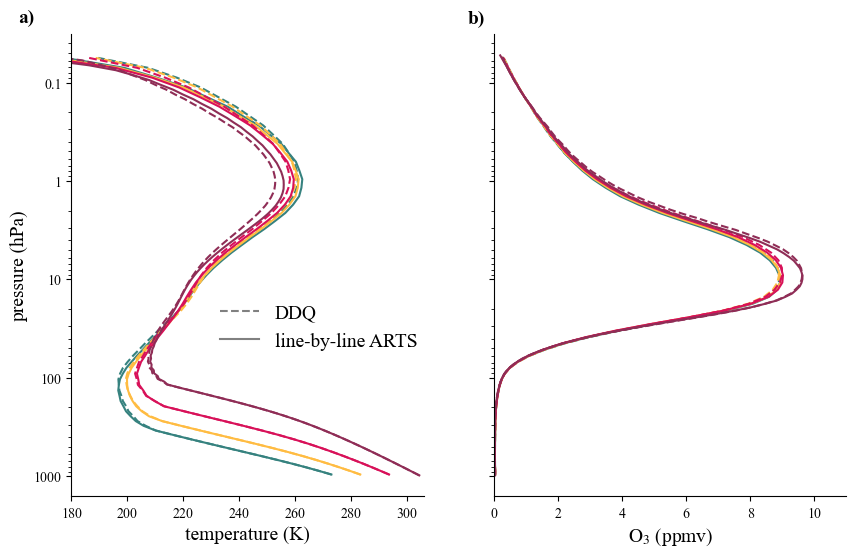

In [35]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize = (10, 6))

for idx in range(len(Ts_array)):

    l, = plots.profile_p_log(quad.atmosphere["plev"], final_temps_ddq[idx, :], ax=ax0, linestyle = 'dashed', color = color_array[idx])
    l, = plots.profile_p_log(arts_atmosphere["plev"], final_temps_arts[idx, :], ax=ax0, color = color_array[idx])
    
    plots.profile_p_log(
        quad.atmosphere["plev"],
        final_ozone_ddq[idx, :] * 1e6,
        #label="DDQ",
        ax=ax1,
        linestyle = 'dashed',
        color = color_array[idx],
    )
        
    plots.profile_p_log(
        arts_atmosphere["plev"],
        final_ozone_arts[idx, :] * 1e6,
        #label= "ARTS",
        ax=ax1,
        color = color_array[idx],
    )

    ax1.set_xlabel(r"$\rm O_3$ (ppmv)", fontsize = 14)
    ax1.set_xlim(0, 11)
    #ax1.legend(title=r"$T_\mathrm{s}$", fontsize="x-small")
    sns.despine()


l, = plots.profile_p_log(quad_305.atmosphere["plev"], final_temps_quad_305, ax=ax0, linestyle = 'dashed', color = color_array[-1])
l, = plots.profile_p_log(arts_atmosphere_305["plev"], final_temps_arts_305, ax=ax0, color = color_array[-1])

plots.profile_p_log(
    quad_305.atmosphere["plev"],
    final_ozone_quad_305 * 1e6,
    ax=ax1,
    linestyle = 'dashed',
    color = color_array[-1],
)

plots.profile_p_log(
    arts_atmosphere_305["plev"],
    final_ozone_arts_305 * 1e6,
    #label= "ARTS",
    ax=ax1,
    color = color_array[-1],
)

ax0.set_xlabel(r"temperature (K)", fontsize = 14)
ax0.set_xlim(180, 306)
ax0.set_ylabel("pressure (hPa)", fontsize = 14)
#ax0.set_ylim(bottom=quad.atmosphere["plev"].max())


fig.text(0.08, 0.9, 'a)', color = 'black', horizontalalignment = 'center', fontsize = 14, weight = 'bold')
fig.text(0.53, 0.9, 'b)', color = 'black', horizontalalignment = 'center', fontsize = 14, weight = 'bold')

ax0.plot([], [], '--', color = 'grey', label = 'DDQ')
ax0.plot([], [], color = 'grey', label = 'line-by-line ARTS')
ax0.legend(frameon = False, loc = (0.4, 0.3), fontsize = 14)

#plt.savefig("figures/konrad_ozone.png", bbox_inches = 'tight', dpi = 300)

plt.show()
